In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from matplotlib import tri

In [43]:
# Question 4: Cross product

# Receives two two-dimensional vectors, a and b, interpreted as three-dimensional vectors lying on the XY plane.
# Returns the cross product between them
def cross(a,b):
    return a[0]*b[1] - a[1]*b[0]

# Receives two line segments, ab and cd, on the XY plane and returns if they intercept or not
def intersect(a,b,c,d):
    ab = np.subtract(b, a)
    ac = np.subtract(c, a)
    ad = np.subtract(d, a)
    
    cd = np.subtract(d, c)
    ca = np.subtract(a, c)
    cb = np.subtract(b, c)
    
    p1 = cross(ab, ac) * cross(ab, ad)
    p2 = cross(cd, ca) * cross(cd, cb)
    
    return p1 < 0 and p2 < 0

# Receives three points, a, b and c, on the XY plane, and returns the oriented area of their parallelogram
def oriented_area(a,b,c):
    o = np.array([0,0])
    
    oa = np.subtract(a,o)
    ob = np.subtract(b,o)
    oc = np.subtract(c,o)
    
    return 0.5 * (cross(oa, ob) + cross(ob, oc) + cross(oc, oa))

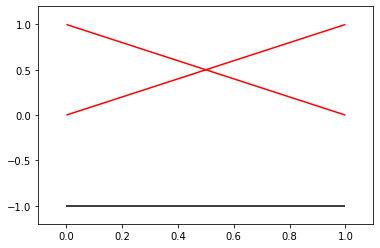

In [24]:
# Visualize Question 4 results:

# Line intersection

# Returns color c1 if ab and cd intersect, and color c2 otherwise
def get_color(a, b, c, d, c1, c2):
    return c1 if intersect(a, b, c, d) else c2

a1 = np.array([0,0])
a2 = np.array([1,1])

b1 = np.array([1,0])
b2 = np.array([0,1])

c1 = np.array([0,-1])
c2 = np.array([1,-1])

a = np.array([a1,a2]).reshape((-1,2))
b = np.array([b1,b2]).reshape((-1,2))
c = np.array([c1,c2]).reshape((-1,2))

# Show line segments that intersect with a as red, black otherwise 
lines = [a, b, c]
int_col = [1,0,0,1]
nint_col = [0,0,0,1]

colors = np.array([int_col, get_color(a1,a2,b1,b2,int_col,nint_col), get_color(a1,a2,c1,c2,int_col,nint_col)])

lc = mc.LineCollection(lines, colors=colors)

fig, ax = plt.subplots()

ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

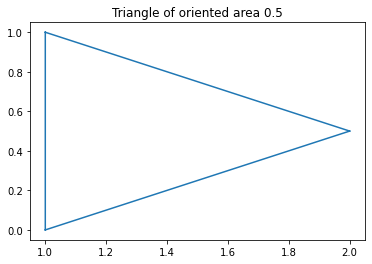

In [45]:
# Oriented area
a = np.array([1,0])
b = np.array([2,0.5])
c = np.array([1,1])

points = np.array([a, b, c]).reshape((3,-1))
indices = [[0, 1, 2]]

tris = tri.Triangulation(points[:,0], points[:,1], triangles=indices)

plt.title(f'Triangle of oriented area {oriented_area(a,b,c)}')
lines = plt.triplot(tris)